In [3]:
#importing required Libraries
import numpy as np
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import skimage
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
import os
dataset_pth = '/kaggle/input/animals10/raw-img/'

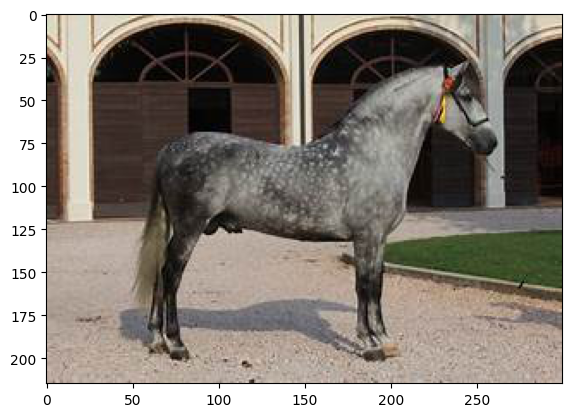

In [8]:
# accessing an image file from the dataset classes
image = io.imread('/content/OIP-icHI57RvbkUMd-RfbIK46wHaFT.jpeg')  

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)


Text(0.5, 0.98, 'Original & RGB image channels')

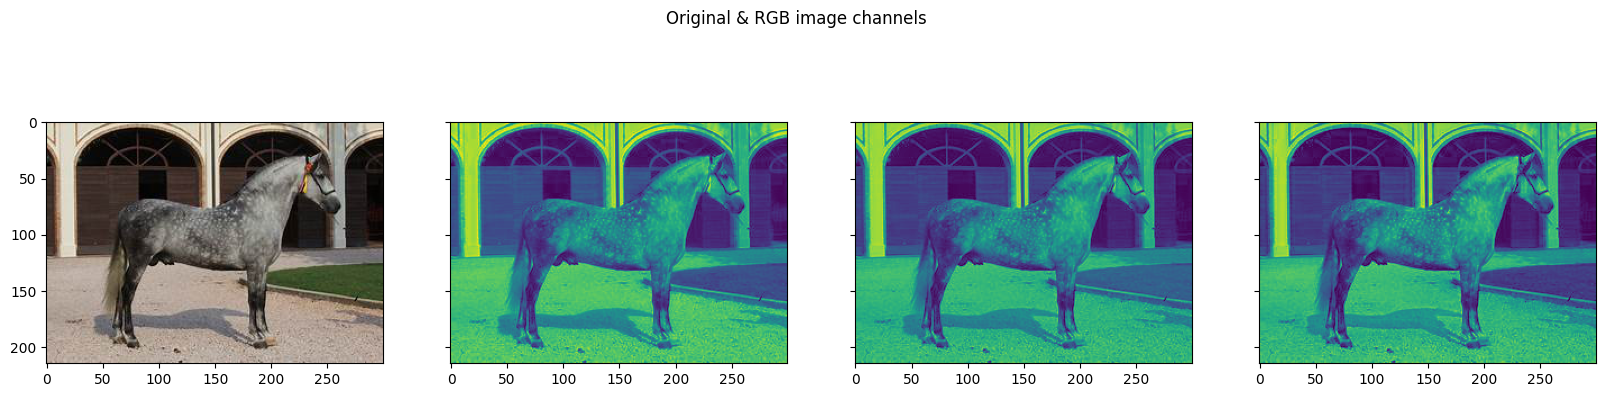

In [9]:
# plotting the original image and the RGB channels  

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

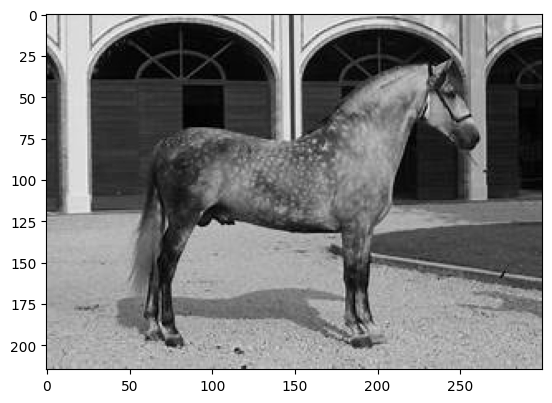

In [10]:
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

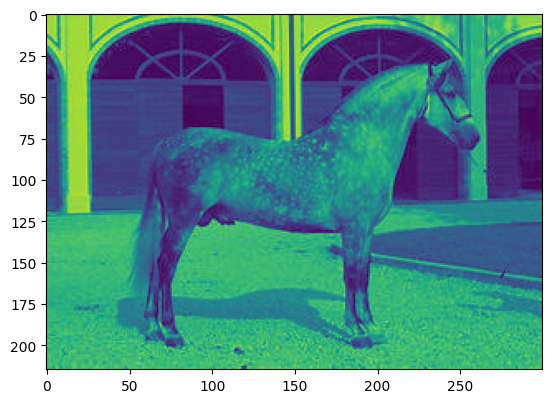

In [11]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

In [12]:
!pip install keras_preprocessing


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.3 MB/s eta 0:00:00


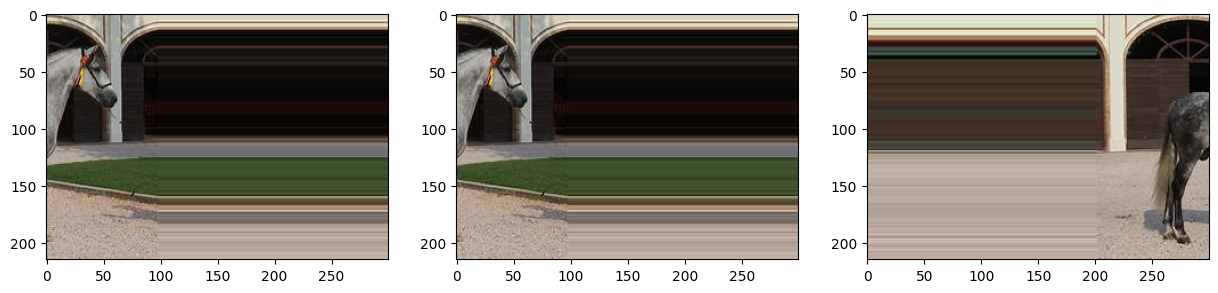

In [13]:
from numpy import expand_dims
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):
  # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

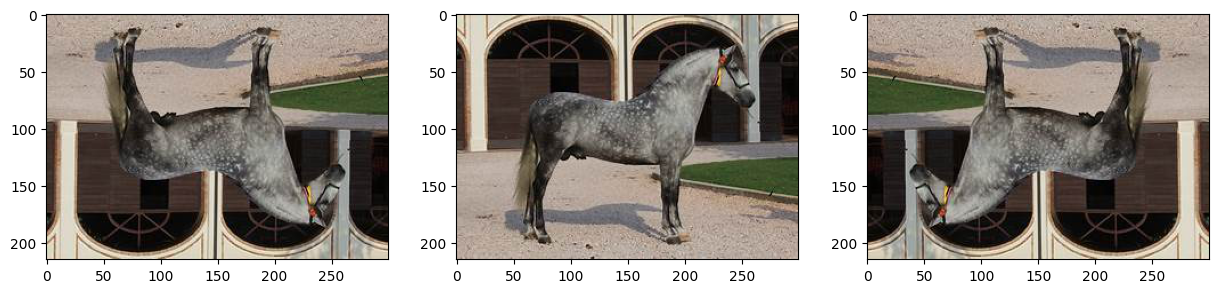

In [14]:
# ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

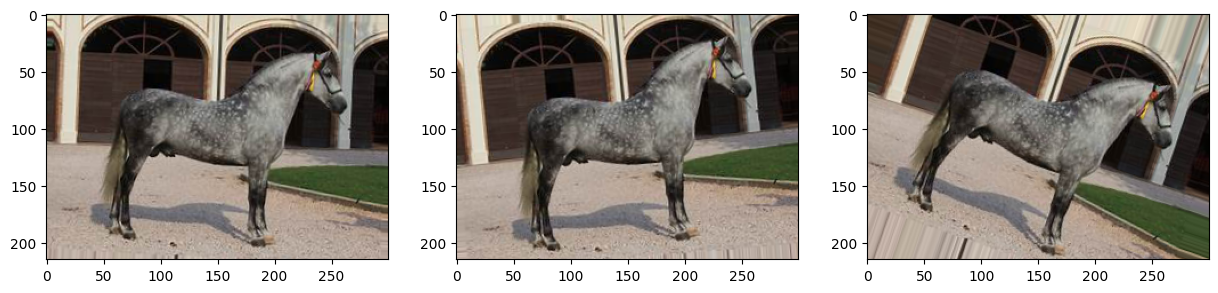

In [15]:
# ImageDataGenerator for rotation
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

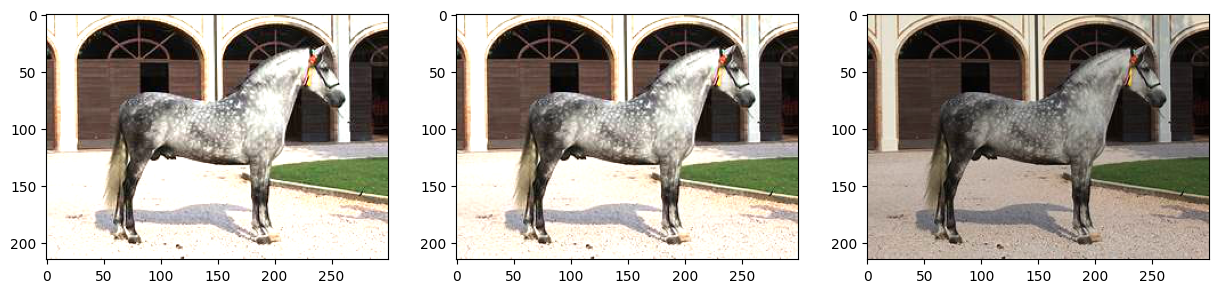

In [16]:
# ImageDataGenerator for brightness
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

/usr/local/lib/python3.9/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.9/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


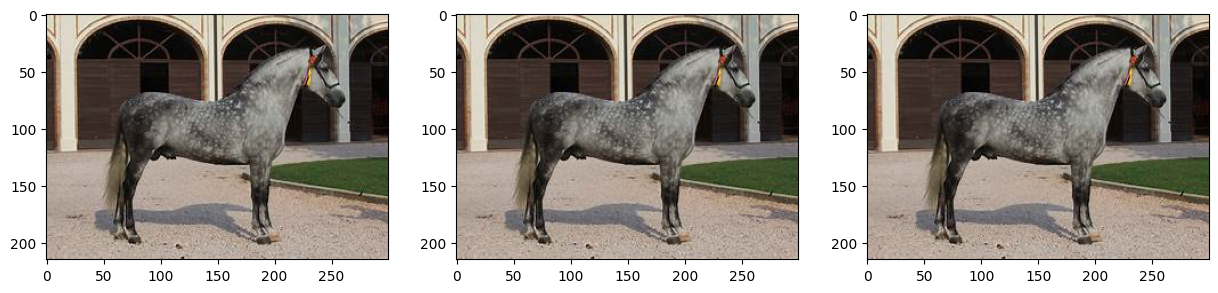

In [17]:
# creating the image data generator to standardize images
datagen = ImageDataGenerator(featurewise_center =True,
      featurewise_std_normalization = True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 